In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
data = pd.read_csv("./data.csv")

selected_features = ["GDX_Open", "GDX_Low", "GDX_High", "GDX_Adj Close", "GDX_Close",
                     "GDX_Volume", "PLD_Price", "PLD_Low", "PLD_High", "PLD_Open", "SF_Low", "SF_High"]

# target column
y = data['Adj Close'].values

# drop necessary columns
data= data.drop(columns=['Close', 'Date','Open', 'Low', 'Adj Close', 'High'])

# define X
X = data[selected_features].values

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the Random Forest model and parameter grid
param_grid = {
    'n_estimators': [10, 25, 50],
    'max_depth': [5, 9, 15],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [5, 9, 15]
}

In [5]:
# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

In [6]:
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [7]:
# Print the best parameters and scores
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (negative MSE):", grid_search.best_score_)

# Evaluate the model on the test data
y_pred = best_model.predict(X_test)
print("Test Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Test R^2 Score:", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': 15, 'n_estimators': 50}
Best Cross-Validation Score (negative MSE): -6.445514087432011
Test Mean Squared Error: 6.326481403941855
Test R^2 Score: 0.9797018971027027


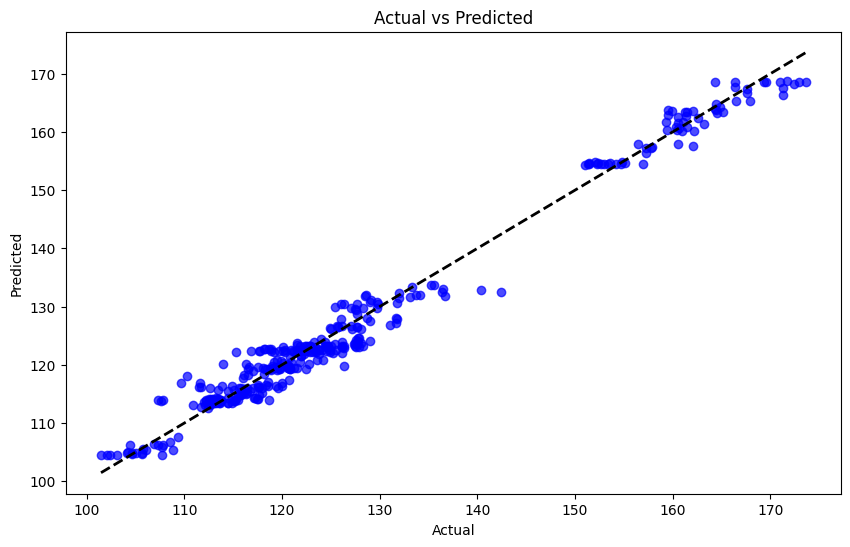

In [8]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

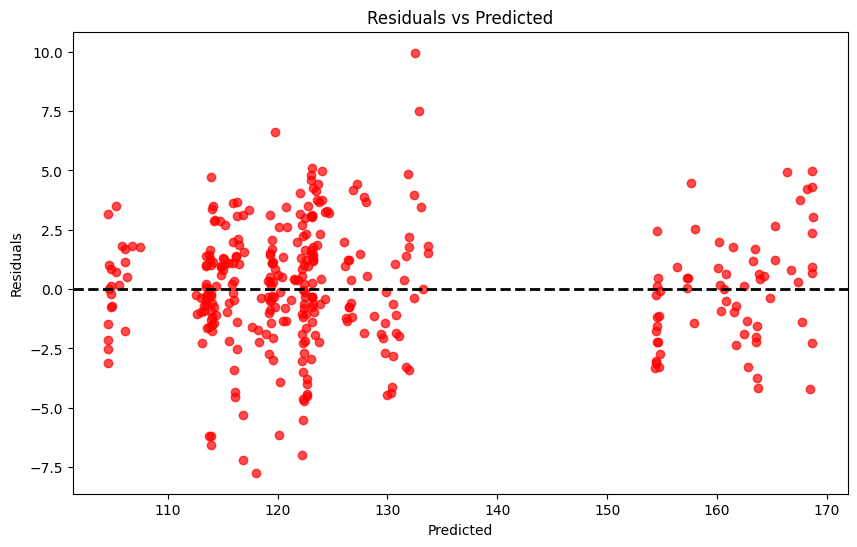

In [9]:
# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='r')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

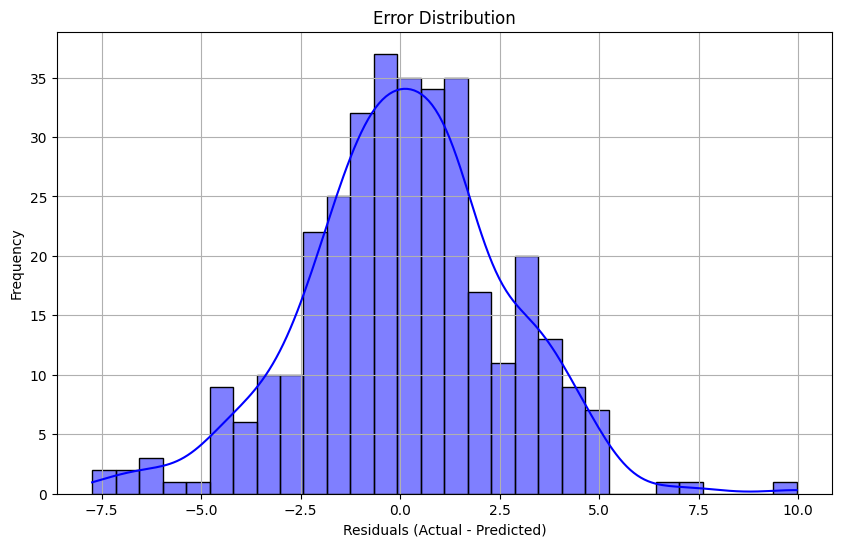

In [10]:
# Error Distribution Plot
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color='blue', edgecolor='black')
plt.title("Error Distribution")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()